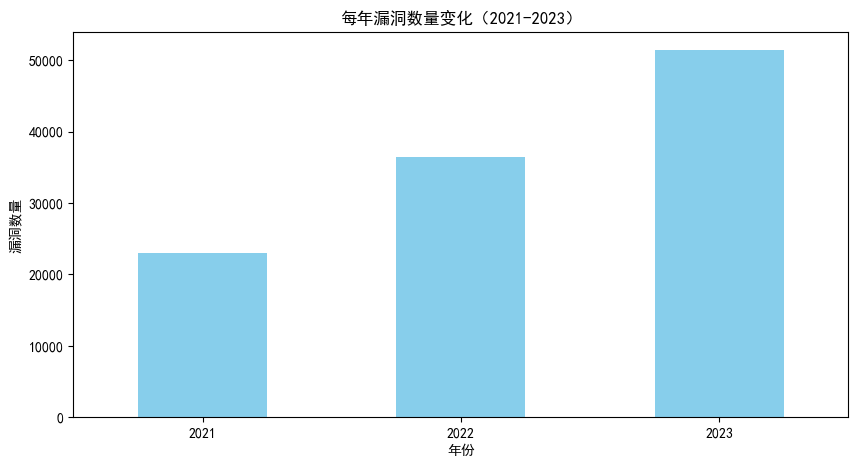

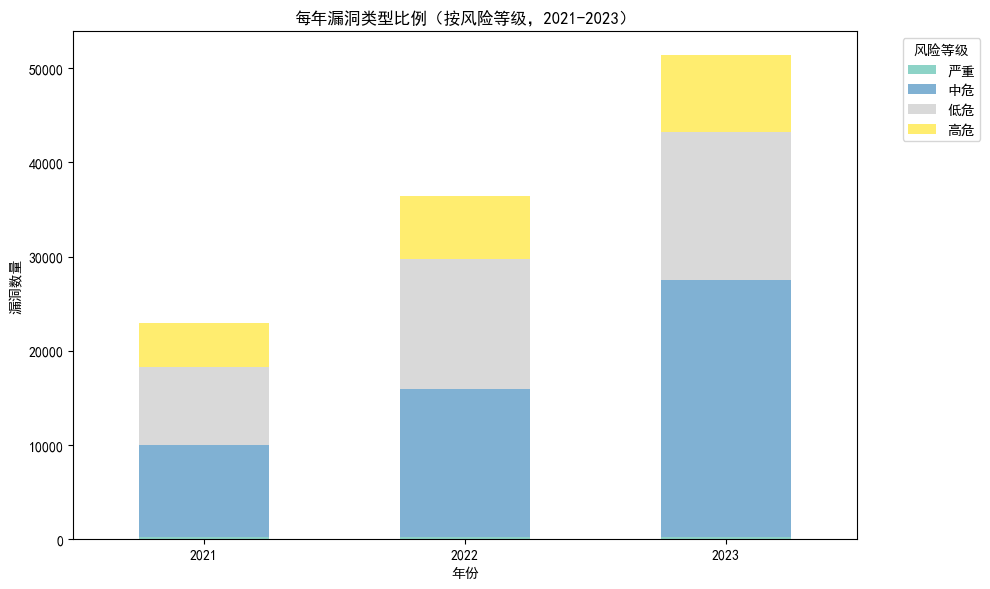

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文字体，避免中文显示问题
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体
rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 读取CSV文件
file_path = 'sjtu.csv'
data = pd.read_csv(file_path)

data_copy = data.copy()

# 将'date'列转换为日期格式，并提取年份
data_copy['date'] = pd.to_datetime(data_copy['date'], errors='coerce')
data_copy['year'] = data_copy['date'].dt.year

# 筛选出2021、2022和2023年的数据
filtered_data = data_copy[data_copy['year'].isin([2021, 2022, 2023])]

# 统计每年漏洞的数量
vulnerabilities_per_year = filtered_data.groupby('year').size()

# 按年和风险等级(rank)统计每类漏洞的数量
vulnerabilities_by_type = filtered_data.groupby(['year', 'rank']).size().unstack(fill_value=0)

# 绘制每年漏洞数量的柱状图
plt.figure(figsize=(10, 5))
vulnerabilities_per_year.plot(kind='bar', color='skyblue')
plt.title('每年漏洞数量变化（2021-2023）')
plt.xlabel('年份')
plt.ylabel('漏洞数量')
plt.xticks(rotation=0)
plt.show()

# 绘制每年漏洞类型比例的堆叠柱状图
vulnerabilities_by_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('每年漏洞类型比例（按风险等级，2021-2023）')
plt.xlabel('年份')
plt.ylabel('漏洞数量')
plt.xticks(rotation=0)
plt.legend(title="风险等级", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


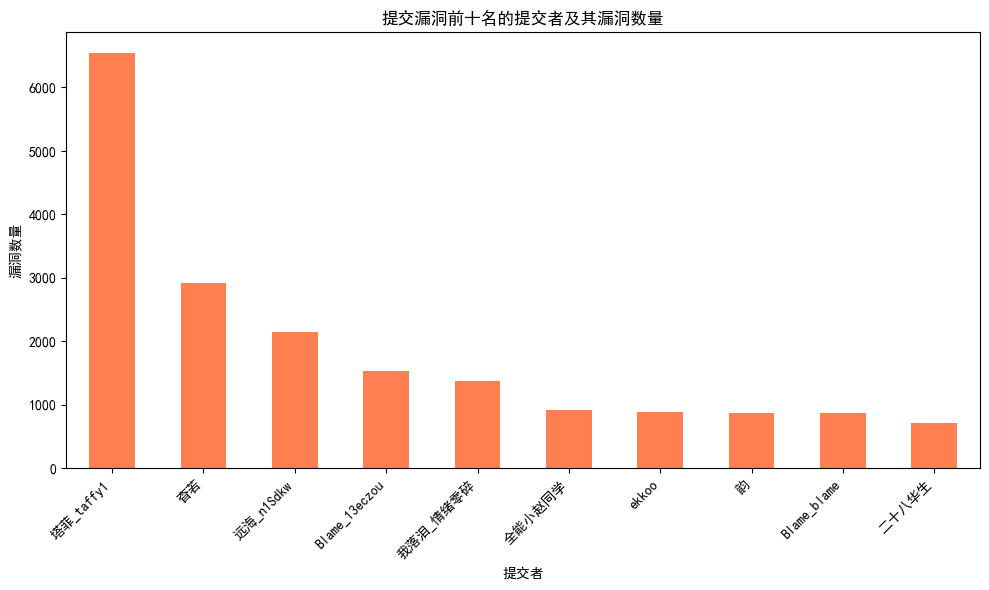

In [2]:
# 按提交者(author)统计漏洞数量
author_vulnerabilities = filtered_data['author'].value_counts()

# 筛选出提交漏洞最多的前十名
top_10_authors = author_vulnerabilities.head(10)

# 绘制提交漏洞前十名的柱状图
plt.figure(figsize=(10, 6))
top_10_authors.plot(kind='bar', color='coral')
plt.title('提交漏洞前十名的提交者及其漏洞数量')
plt.xlabel('提交者')
plt.ylabel('漏洞数量')
plt.xticks(rotation=45, ha='right')  # 倾斜显示提交者名字
plt.tight_layout()
plt.show()


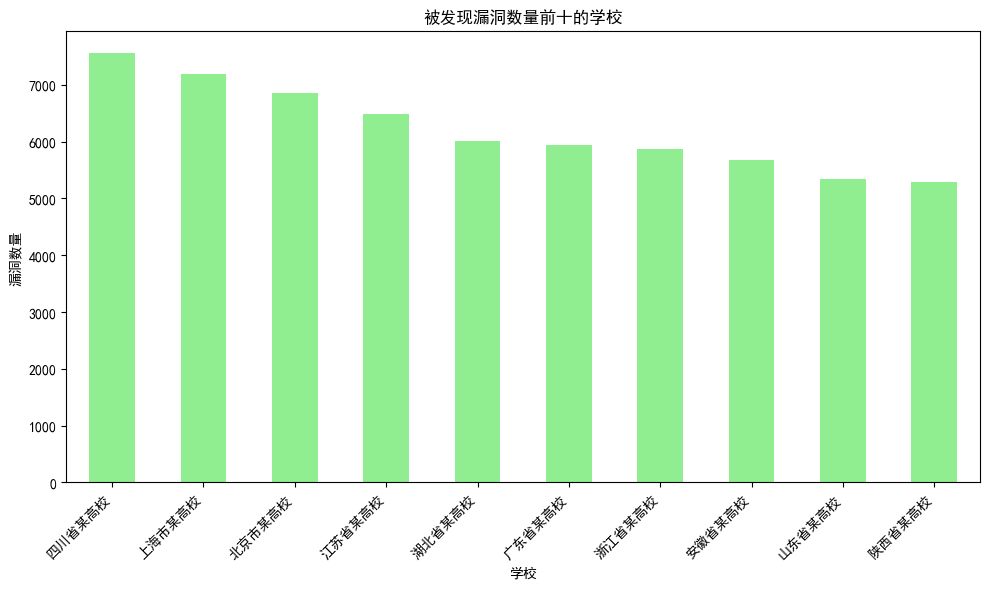

In [3]:
# 假设 'title' 列包含学校名称，提取学校并统计漏洞数量
# 在实际使用中可能需要根据具体数据格式调整如何提取学校名称
school_vulnerabilities = filtered_data['title'].value_counts()

# 筛选出漏洞数量最多的前十所学校
top_10_schools = school_vulnerabilities.head(10)

# 绘制前十所学校存在漏洞数量的柱状图
plt.figure(figsize=(10, 6))
top_10_schools.plot(kind='bar', color='lightgreen')
plt.title('被发现漏洞数量前十的学校')
plt.xlabel('学校')
plt.ylabel('漏洞数量')
plt.xticks(rotation=45, ha='right')  # 倾斜显示学校名称
plt.tight_layout()
plt.show()


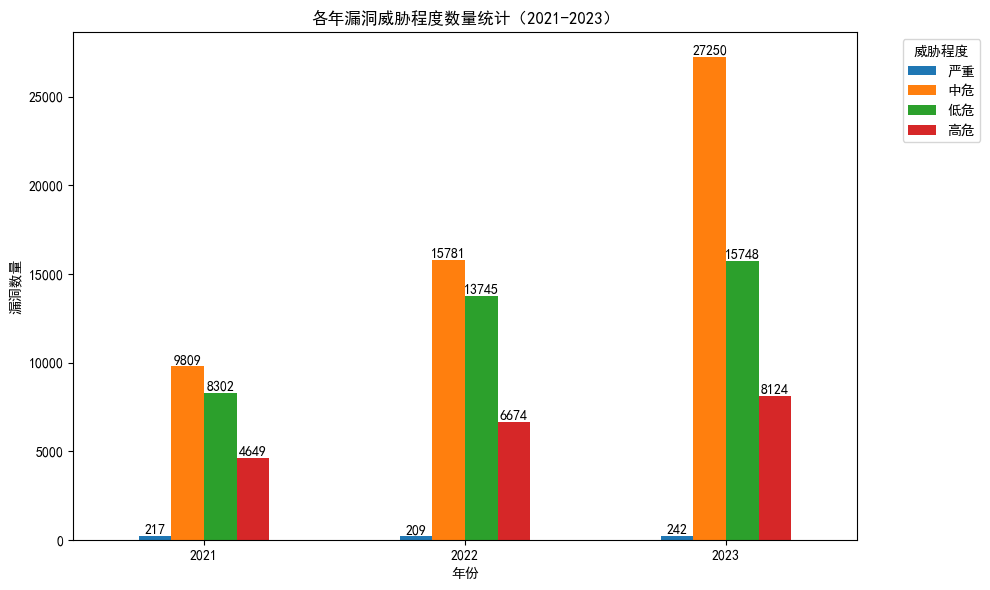

In [4]:
# 按年和风险等级(rank)统计每类漏洞的数量
vulnerabilities_by_threat = filtered_data.groupby(['year', 'rank']).size().unstack(fill_value=0)

# 绘制分组柱状图，展示每年不同威胁等级的数量
ax = vulnerabilities_by_threat.plot(kind='bar', figsize=(10, 6))
plt.title('各年漏洞威胁程度数量统计（2021-2023）')
plt.xlabel('年份')
plt.ylabel('漏洞数量')
plt.xticks(rotation=0)
plt.legend(title="威胁程度", bbox_to_anchor=(1.05, 1), loc='upper left')

# 在每个柱状图上添加数值标签
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # 在柱子的边缘标注数量

plt.tight_layout()
plt.show()